<h1 style="text-align: center;">Block Diagrams and System Stability</h1>
<p style="text-align: center;">Lab 7</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with Laplace-domain block diagrams and use the factored form of the transfer function to judge system stability. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Equations for the transfer functions in **Task 1**.  
[ ] Printed output using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Equation of the open-loop transfer function for **Task 3**
[ ] Plot showing the step response of the open-loop transfer function for **Task 4**.
  
##### Part 2
[ ] Equation of the closed-loop transfer function for **Task 1**
[ ] Printed output and numerical equations using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Plot showing the step response of the open-loop transfer function for **Task 3**. 

![Block diagram](BlockDiagram1.png)

$$ G(s) = \frac{s + 9}{(s^2 - 6s - 16)(s + 4)} $$  
$$ A(s) = \frac{s + 4}{s^2 + 4s +3} $$  
$$ B(s) = s^2 + 26s + 168 $$

### 3. Part 1
##### 3.1 Purpose
Analyze a block diagram and learn how to use Python functions to perform the same analysis.  
##### 3.2 Tasks   
1. Type $G(s)$, $A(s)$, and $B(s)$ in factored form, isolating the poles and zeros. Identify the poles and zeros of each function.

Factored form of $G(s)$:  
>$G(s) = \dfrac{s + 9}{(s-8)(s+2)(s+4)}$  

Factored form of $A(s)$:  
>$A(s) = \dfrac{s+4}{(s+1)(s+3)}$    

Factored form of $B(s)$:  
>$B(s) = (s+12)(s+14)$   

Poles of $G(s)$:  
>$s=8 \quad s=-2 \quad s=-4$

Poles of $A(s)$:  
>$s=-1 \quad s=-3$

Poles of $B(s)$:  
>None

Zeros of $G(s)$:  
>$s=-9$

Zeros of $A(s)$:  
>$s=-4$ 

Zeros of $B(s)$:  
>$s=-12 \quad s=-14$,

###### 3.2.1 Example Code  
The following example code uses **scipy.signal.convolve()** to expand a factored transfer function, described by $H(s) = \dfrac{(8s + 1)(2s +3)}{(9s^2 + 2s)(s + 4)}$.

In [11]:
import scipy.signal as sig

num = sig.convolve([8, 1], [2, 3])
den = sig.convolve([9, 2, 0], [1, 4])

print(f"Expanded Numerator: {num}\nExpanded Denominator: {den}")

Expanded Numerator: [16 26  3]
Expanded Denominator: [ 9 38  8  0]


Making the expanded transfer function $H(s) = \dfrac{16s^2 + 26s + 3}{9s^3 + 38s^2 + 8s}$.  

2. Use the **scipy.signal.tf2zpk()** function to check your results from **Task 1** and print the output. *Note: since $B(s)$ has a denominator of 1, you may use **numpy.roots()** instead*.

In [12]:
# Insert all necessary imports here
import numpy as np
import scipy.signal as sig

In [13]:
# Insert code for Part 1 Task 2 here
G_num = [1,9]
G_den = [1,-2,-40,-64]

A_num = [1,4]
A_den = [1,4,3]

B_num = [1, 26, 168]

G_zeros, G_poles, G_gain = sig.tf2zpk(G_num, G_den)
A_zeros, A_poles, A_gain = sig.tf2zpk(A_num, A_den)
B_zeros = np.roots(B_num)

print("Poles of G(s):", G_poles)
print("Poles of A(s):", A_poles)

print("Zeros of G(s):", G_zeros)
print("Zeros of A(s):", A_zeros)
print("Zeros of B(s):", B_zeros)


Poles of G(s): [ 8. -4. -2.]
Poles of A(s): [-3. -1.]
Zeros of G(s): [-9.]
Zeros of A(s): [-4.]
Zeros of B(s): [-14. -12.]


3. Type and properly format the open-loop transfer function where $x(t)$ is the input and $y(t)$ is the output. Keep your answer in factored form.

Insert the open-loop transfer function here:  
$$ H(s) = A(s)G(s)B(s) = \dfrac{(s+9)(s+12)(s+14)}{(s-8)(s+2)(s+1)(s+3)}$$

4. Plot the step response of the open-loop transfer function. Use **scipy.signal.convolve()** to expand the numerator and denominator of the open-loop transfer function. 

Expanded Numerator: [   1   35  402 1512]
Expanded Denominator: [  1  -2 -37 -82 -48]


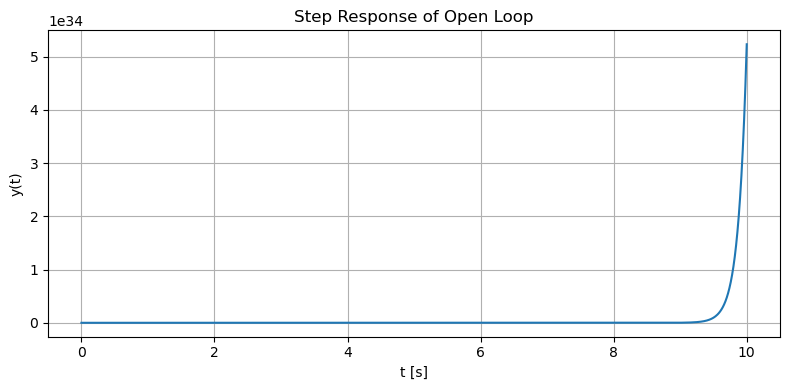

In [14]:
# Insert code plotting the step response of the open-loop transfer function here
import matplotlib.pyplot as plt

num_open_1 = sig.convolve([1,9], [1,12])
num_open = sig.convolve(num_open_1,[1,14])

den_open_1 = sig.convolve([1,-8], [1,2])
den_open_2 = sig.convolve([1,1], [1,3])
den_open = sig.convolve(den_open_1,den_open_2)
print(f"Expanded Numerator: {num_open}\nExpanded Denominator: {den_open}")

step = 1e-2
t = np.arange(0, 10 + step, step)

tout, yout = sig.step((num_open, den_open), T = t)

plt.figure(figsize=(8,4))
plt.plot(tout, yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Step Response of Open Loop")
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Become more familiar with using Python for analyzing block diagrams and stability of closed-loop systems.
##### 4.2 Tasks   
1. Type the closed-loop transfer function for the given block diagram symbolically in terms of each blocks numerator and denominator (i.e., numG, denG, ...).

Insert the closed-loop transfer function here:  
$$ H(s) = \frac{A(s)G(s)}{1 +B(s)G(s)} = \frac{numA \ numG}{denA \ denG + denA \ numB \ numG}$$

2. Using **scipy.signal.convolve()** and **scipy.signal.tf2zpk()** to perform all the arithmetic, find numerical values for the total numerator and denominator, find poles and zeros, then type the resulting numeric transfer function in both expanded and factored form.

In [15]:
# Insert code for Part 2 Task 2 here

G_num = [1,9]
G_den = [1,-2,-40,-64]

A_num = [1,4]
A_den = [1,4,3]

B_num = [1, 26, 168]
#total numerator
num_close = sig.convolve(A_num, G_num)
#denominator 1
den_close_dAdG = sig.convolve(A_den, G_den)
#denominator 2
den_close_dAnB = sig.convolve(A_den, B_num)
den_close_dAnBnG = sig.convolve(den_close_dAnB, G_num)
#total denominator
den_close = den_close_dAdG + den_close_dAnBnG

closed_zeros, closed_poles, closed_gain = sig.tf2zpk(num_close, den_close)

print(f"Expanded Numerator: {num_close}\nExpanded Denominator: {den_close}")

print("Poles of closed loop H(s):")
for i in range(len(closed_poles)):
    print(f"{closed_poles[i]:.4f}")

print("Zeros of closed loop H(s):")
for i in range(len(closed_zeros)):
    print(f"{closed_zeros[i]:.4f}")

Expanded Numerator: [ 1 13 36]
Expanded Denominator: [   2   41  500 2995 6878 4344]
Poles of closed loop H(s):
-5.1624+9.5180j
-5.1624-9.5180j
-6.1753+0.0000j
-3.0000+0.0000j
-1.0000+0.0000j
Zeros of closed loop H(s):
-9.0000
-4.0000


Insert the expanded numeric closed-loop transfer function here:  
$$ H(s) = \frac{s^2 +13s +36}{ 2s^5 + 41s^4 + 500s^3 + 2995s^2 + 6878s + 4344}$$

Insert the factored numeric closed-loop transfer function here:  
$$ H(s) = \frac{(s+9)(s+4)}{(s+5.1624-j9.5180)(s+j5.1624+9.5180)(s+6.1753)(s+1)}$$

3. Plot the step response of the closed-loop transfer function using **scipy.signal.step()**.

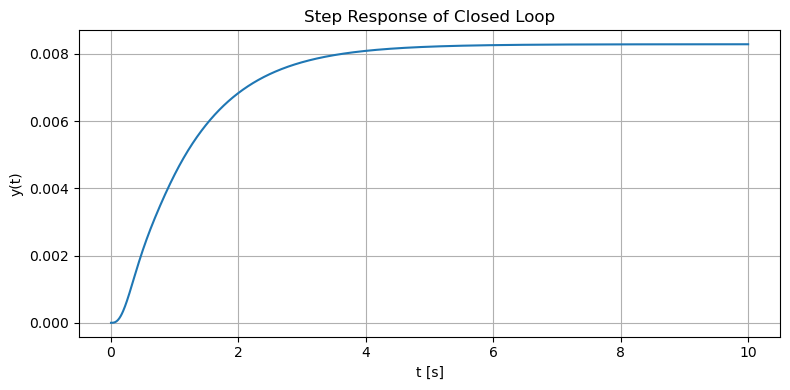

In [16]:
# Insert code for Part 2 Task 3 here

step = 1e-2
t = np.arange(0, 10 + step, step)

tout, yout = sig.step((num_close, den_close), T = t)

plt.figure(figsize=(8,4))
plt.plot(tout, yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Step Response of Closed Loop")
plt.tight_layout()
plt.show()

### 5. Questions
1. Considering the expression found in **Part 1, Task 3**, is the open-loop response stable? Explain why or why not.    
> It is not stable. The pole $s=8$ is in the right side of the s-plane, meaning it will exponentially grow, not decay to a stable state.  
2. Does the plot from **Part 1, Task 4** support your answer to **Question 1**? Explain how or how it does not.  
> Yes. The plot shows that the open-loop system experiences exponential growth that at no point decays to a stable state.
3. In **Part 1, Task 4**, why does convolving the factored terms using **scipy.signal.convolve()** result in the expanded form of the numerator and denominator? Would this work with your user-defined convolution function from **Lab 3**? Why or why not?  
>The scipy convolution function works for polynomial expansion because convolution, mathematically, is the sum of all possible products of the two inputs. If we interpret $3 * 4$ as a convolution and compare it to $(3)(4)$, the results are both 12, as two scalar values have only one possible product. The same applies for polynomial multiplication, as multiplying $(s^2+as+c)(s^2+bs+b)$ requires that each term of one polynomial be multiplied by each term of the other polynomial and summed. Thus, it is the sum of all possible products the polynomials have.
>
>The convolution function from lab 3 would work, as the "sliding two arrays over each other" approach is practically the same as traditional, term-by-term polynomial multiplication. Applying the slide method to the two polynomials, $(s+3)$ and $(s+4)$, we can see the correct result is produced by summing the products of overlapping terms:
> 
>$\qquad (s+3) \quad (s+3) \quad (s+3) $
> 
>$ \ (s+4) \qquad  \ \ \ (s+4) \qquad \ \ \ (s+4)  $
>
>$\qquad 4s \qquad  \quad s^2 + 12    \qquad  \ \ \ 3s$
>
>$(s+3)(s+4) = s^2 +7s +12$
4. Using the closed-loop transfer function found in **Part 2, Task 1**, is the closed-loop response stable? Explain why or why not.
>Yes. All poles are in the left side of the s-plane, meaning they will all lead to exponential decay, resulting in the system eventually reaching a stable state.
5. Does the result from **Part 2, Task 3** support your answer to **Question 4**? Explain how or how it does not.  
>Yes. The plot shows the function's rate of growth decreases and the output eventually reaches a constant value, meaning the system has reached a stable state. 
6. What is the difference between **scipy.signal.residue()** used in **Lab 6** and **scipy.signal.tf2zpk()** used in this lab?  
>The residue function produces values that form the partial fraction expansion, allowing the transfer function to be easily converted to the time domain. The tf2zpk function factors the transfer function, making analyzing stability easier as the poles and roots are apparent. While both produce poles, residues $\neq$ roots. Roots tell you what frequency values are not in the functon's output, where the residues are residual coeffecients that alter/define the behavior at that pole.
7. Is it possible for an open-loop system to be stable? What about for a closed-loop system to be unstable? Explain how or how it is not for each.  
>Yes, both open-loop and closed-loop systems can be stable or unstable. The only difference between closed-loop and open-loop systems is whether there is feedback. An open-loop system is "open" in that the system does not feed back into itself, where as a closed-loop does. An open-loop system can take an input and transform it into an output without a component of the system preventing decay to stability. Similarly, a closed-loop system can have positive feedback that introduces infinite growth, rather than counteracting growth with decay.  
8. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.